In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/04.%20Model%20Training/06.%20MT%20-%20Random%20Forest.ipynb

In [2]:
pathPickle = "Pickles"
path_df = pathPickle+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = pathPickle+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pathPickle+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pathPickle+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pathPickle+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
print(features_train.shape)
print(features_test.shape)

rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

(3383, 300)
(598, 300)
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [4]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# max_features
max_features = ['auto', 'sqrt']
# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
# min_samples_split
min_samples_split = [2, 5, 10]
# min_samples_leaf
min_samples_leaf = [1, 2, 4]
# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [5]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=10, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.897, total=   2.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.896, total=   3.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.899, total=   4.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.2s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, score=0.904, total=  18.4s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.7s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, score=0.903, total=  17.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.9s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, score=0.905, total=  17.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, score=0.887, total=  15.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, score=0.890, total=  18.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, score=0.893, total=  17.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, score=0.898, total=   5.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, score=0.901, total=   5.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, score=0.905, total=   5.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, score=0.897, total=  10.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=0.897, total=  11.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, score=0.902, total=  17.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, score=0.903, total=  18.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, score=0.903, total=  18.4s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_d

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, score=0.887, total=   5.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, score=0.889, total=   5.4s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, score=0.903, total=  10.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, score=0.905, total=   9.4s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False, score=0.886, total=   8.3s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False, score=0.893, total=   7.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=40, bootstrap=False, score=0.890, total=   7.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, score=0.896, total=  10.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_de

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=0.890, total=   9.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, score=0.898, total=  11.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, score=0.899, total=  12.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, score=0.897, total=  12.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=auto, 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 26.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [6]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9045225089727534


In [7]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=10)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.902, total=  11.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.907, total=  12.2s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.4s remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, score=0.896, total=  12.3s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.7s remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.902, total=  11.9s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.6s remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.907, total=  11.9s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.5s remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, score=0.894, total=  12.0s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, score=0.902, total=  12.1s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, score=0.908, total=  11.8s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, score=0.895, total=  11.7s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s


[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.898, total=  11.0s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.904, total=  10.4s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, score=0.889, total=  10.9s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.897, total=  10.0s
[CV] bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_s

[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.885, total=  11.1s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800, score=0.894, total=  11.6s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800, score=0.902, total=  11.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800, score=0.884, total=  11.0s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samp

[CV]  bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.893, total=  10.5s
[CV] bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, score=0.877, total=  10.7s
[CV] bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.890, total=  10.5s
[CV] bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800, score=0.893, total=  10.5s
[CV] bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 15.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sampl...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                  

In [8]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.9018203521336915


In [9]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [10]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [11]:
rfc_pred = best_rfc.predict(features_test)

In [12]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
0.9674844812296778


In [13]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.9214046822742475


In [14]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        17
           1       0.90      0.96      0.93       230
           2       0.93      0.96      0.95       171
           3       0.96      0.94      0.95        77
           4       0.50      0.22      0.31         9
           5       0.77      0.71      0.74        14
           6       0.98      0.98      0.98        42
           7       0.80      1.00      0.89         4
           8       0.95      0.90      0.92        20
           9       1.00      1.00      1.00        13
          10       0.00      0.00      0.00         1

    accuracy                           0.92       598
   macro avg       0.80      0.73      0.74       598
weighted avg       0.92      0.92      0.91       598



/home/kelu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
len(features_train)+len(labels_test),len(labels_test),len(df)

(3981, 598, 3981)

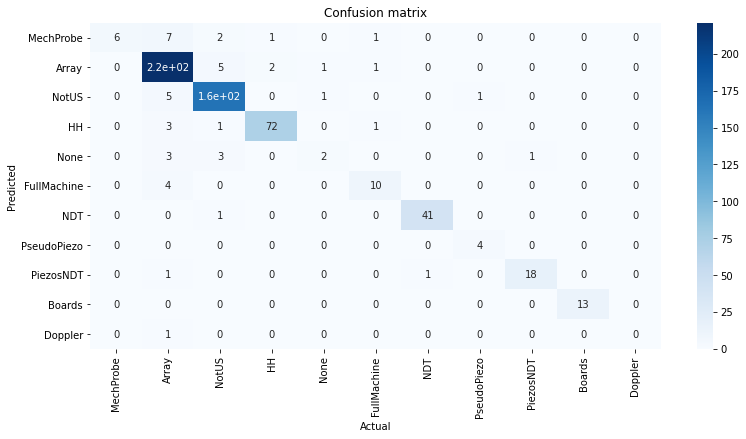

In [16]:
aux_df = df[['group', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['group'].values, 
            yticklabels=aux_df['group'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Let's see if the hyperparameter tuning process has returned a better model:

In [17]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9230769230769231

In [18]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.9214046822742475

In [19]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [20]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.967484,0.921405


In [21]:
with open('Models/best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('Models/df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)